# ML Classification: Comparing Decision Tree, Random Forest, and Neural Network

#### NAIRR AI Unlocked Workshop 2025
#### Deep Learning vs. Machine Learning session

This notebook allows you to load one of four popular datasets, preprocess it, and train three classification models (Decision Tree, Random Forest, and a Neural Network) for comparison. It also includes training and inference timing, evaluation metrics, and visualizations.

---

In [22]:
import importlib
import subprocess
import sys

def install_if_missing(package):
    try:
        importlib.import_module(package)
    except ImportError:
        print(f"Installing missing package: {package}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of essential packages
required_packages = [
    'numpy', 'pandas', 'seaborn', 'matplotlib', 'tensorflow', 'sklearn']

for pkg in required_packages:
    install_if_missing(pkg)

## 1. Setup

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

## 2. Dataset Selection

In [24]:
# Choose from: 'heart', 'wine', 'mushroom', 'titanic'
dataset_name = 'titanic'  # Change as needed
print('You selected the dataset: ' + dataset_name)

You selected the dataset: titanic


## 3. Load Dataset

In [25]:
if dataset_name == 'heart':
    df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
    print('Dataset loaded succesfully!')
elif dataset_name == 'wine':
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
    print('Dataset loaded succesfully!')
elif dataset_name == 'mushroom':
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
    # Define column names based on UCI repository documentation
    column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
                'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
    df.columns = column_names
    print('Dataset loaded succesfully!')
elif dataset_name == 'titanic':
    df = sns.load_dataset('titanic')
    print('Dataset loaded succesfully!')
else:
    raise ValueError("Unsupported dataset")

print(df.shape)
df.head()

Dataset loaded succesfully!
(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 4. Data Preprocessing
Here, we handle missing values, encode categorical variables, and separate features and target.

In [26]:
# Copy and prepare data
data = df.copy()
if dataset_name == 'heart':
    X = data.drop('target', axis=1)
    y = data['target']
elif dataset_name == 'wine':
    X = data.drop('quality', axis=1)
    y = data['quality']
    y = y - y.min()
elif dataset_name == 'mushroom':
    X = data.drop('class', axis=1)
    y = LabelEncoder().fit_transform(data['class'])
    X = pd.get_dummies(X)
elif dataset_name == 'titanic':
    data = data.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'], errors='ignore')
    data = data.dropna(subset=['age', 'embarked'])
    data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
    data['age'] = data['age'].fillna(data['age'].median())
    data['sex'] = LabelEncoder().fit_transform(data['sex'])
    data['embarked'] = LabelEncoder().fit_transform(data['embarked'])
    X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
    y = data['survived']
print('Data preparation completed succesfully!')

Data preparation completed succesfully!


## 5. Train-Test Split and Feature Scaling
Split the data into training and test sets, and normalize features for better model performance.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Train Models with Timing
We train each model separately and measure how long training takes for each.

### 6.1 Train Decision Tree

Decision Tree Training Time: 0.0018 seconds


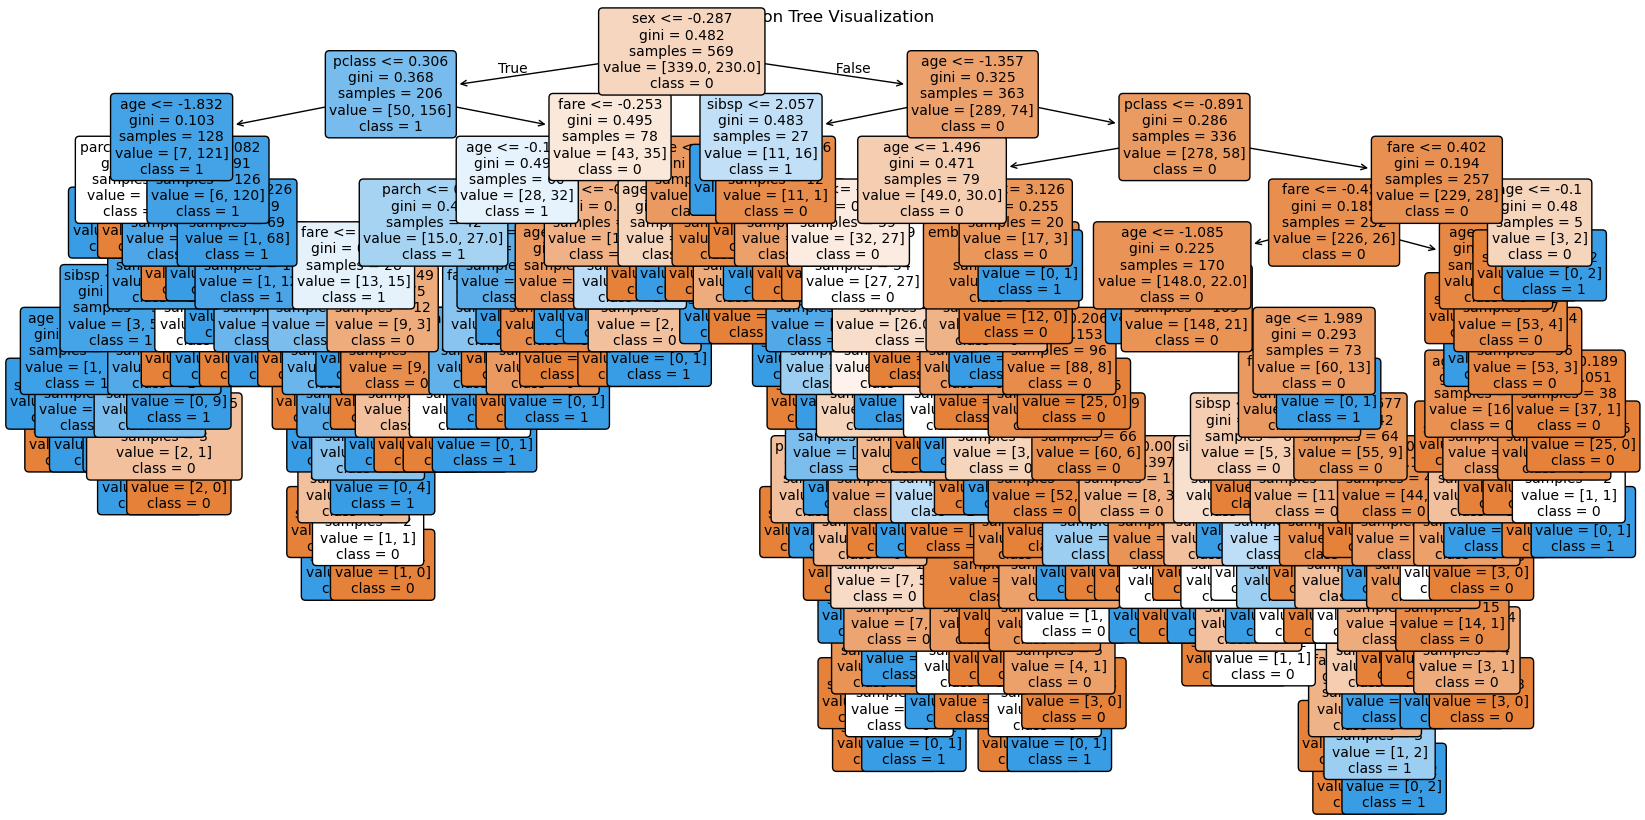

In [28]:
# Decision Tree
start = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_time = time.time() - start
print(f"Decision Tree Training Time: {dt_time:.4f} seconds")

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in dt.classes_], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

### 6.2 Train Random Forest

In [29]:
# Random Forest
start = time.time()
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start
print(f"Random Forest Training Time: {rf_time:.4f} seconds")

Random Forest Training Time: 0.0997 seconds


### 6.3 Train Neural Network

In [30]:
# Neural Network
start = time.time()
nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1 if len(np.unique(y))==2 else len(np.unique(y)), activation='sigmoid' if len(np.unique(y))==2 else 'softmax')
])
loss_fn = 'binary_crossentropy' if len(np.unique(y)) == 2 else 'sparse_categorical_crossentropy'
nn.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

history = nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
nn_time = time.time() - start
print(f"Neural Network Training Time: {nn_time:.4f} seconds")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6249 - loss: 0.8022 - val_accuracy: 0.5702 - val_loss: 0.7644
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5890 - loss: 0.7011 - val_accuracy: 0.6053 - val_loss: 0.6737
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: 0.6271 - val_accuracy: 0.6667 - val_loss: 0.6156
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7743 - loss: 0.5702 - val_accuracy: 0.7281 - val_loss: 0.5732
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7953 - loss: 0.5360 - val_accuracy: 0.7632 - val_loss: 0.5447
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8104 - loss: 0.5099 - val_accuracy: 0.7632 - val_loss: 0.5230
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7811 - loss: 0.5061 - val_accuracy: 0.7719 - val_loss: 0.5050
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8380 - loss: 0.4469 - val_accuracy: 0.7719 - val_loss

## 7. Evaluation Function and Inference Timing
Create a reusable function to evaluate and time inference.

In [31]:
def evaluate_model(name, model, X_test, y_test):
    
    
    start = time.time()
    try:
        if name.lower().startswith('neural network'):
            pred_prob = model.predict(X_test)
            if pred_prob.ndim == 2 and pred_prob.shape[1] > 1:
                y_pred = np.argmax(pred_prob, axis=1)
            elif pred_prob.ndim == 1 or pred_prob.shape[1] == 1:
                y_pred = (pred_prob > 0.5).astype(int).flatten()
            else:
                raise ValueError("Unexpected prediction shape from neural network.")
        else:
            y_pred = model.predict(X_test)
    except Exception as e:
        print(f"Error during prediction: {e}")
        return

    inference_time = time.time() - start

    print(f"{name} Evaluation:")
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Inference Time: {:.6f} seconds".format(inference_time))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## 8. Evaluate All Models

Decision Tree Evaluation:
Accuracy: 0.6783216783216783
Precision: 0.6847448437638312
Recall: 0.6783216783216783
F1 Score: 0.6803474414430032
Inference Time: 0.000564 seconds


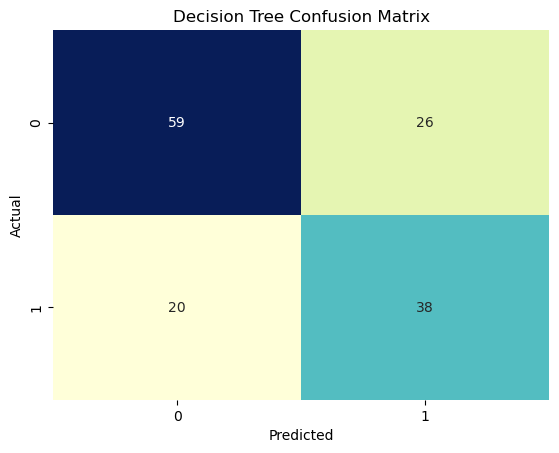

Random Forest Evaluation:
Accuracy: 0.7762237762237763
Precision: 0.7762237762237763
Recall: 0.7762237762237763
F1 Score: 0.7762237762237763
Inference Time: 0.005554 seconds


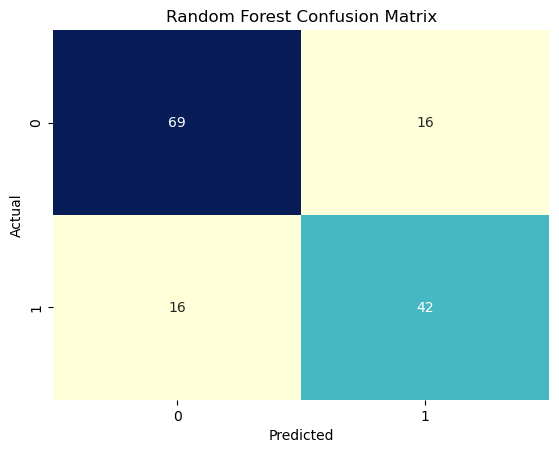

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Neural Network Evaluation:
Accuracy: 0.8181818181818182
Precision: 0.8174902021055866
Recall: 0.8181818181818182
F1 Score: 0.8163223140495868
Inference Time: 0.083225 seconds


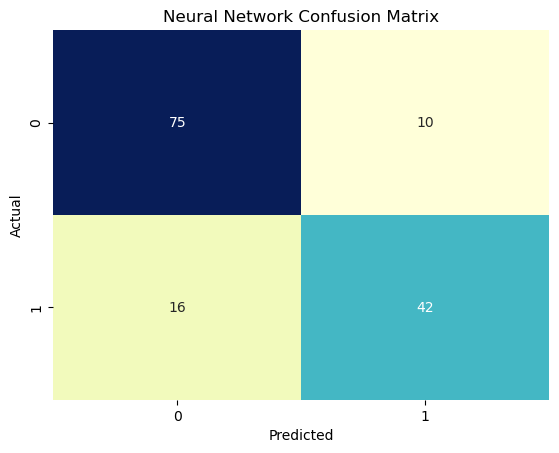

In [32]:
evaluate_model("Decision Tree", dt, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("Neural Network", nn, X_test, y_test)

## 9. (Optional) Neural Network Training Curves
Plot training and validation accuracy and loss for the neural network.

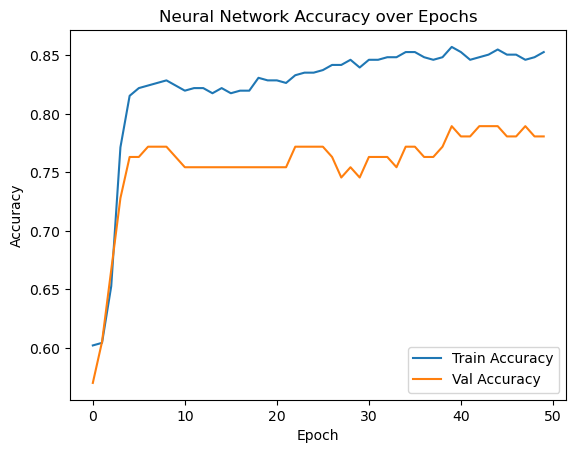

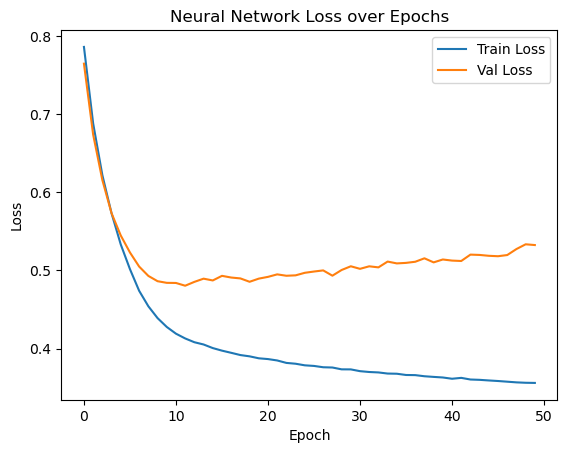

In [33]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Neural Network Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Neural Network Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 10. Summary Metrics

In [34]:
model_names = ["Decision Tree", "Random Forest", "Neural Network"]
models = [dt, rf, nn]

summary = []

for name, model in zip(model_names, models):
    try:
        if name.lower().startswith("neural network"):
            pred_prob = model.predict(X_test)
            if pred_prob.ndim == 2 and pred_prob.shape[1] > 1:
                y_pred = np.argmax(pred_prob, axis=1)
            else:
                y_pred = (pred_prob > 0.5).astype(int).flatten()
        else:
            y_pred = model.predict(X_test)

        summary.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
            "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
        })
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

summary_df = pd.DataFrame(summary)
display(summary_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Model,Accuracy,Precision,Recall,F1 Score
0,Neural Network,0.818182,0.817490,0.818182,0.816322
1,Random Forest,0.776224,0.776224,0.776224,0.776224
2,Decision Tree,0.678322,0.684745,0.678322,0.680347


## Summary
You’ve now trained, evaluated, and compared three classification models across several dimensions:
- **Training time**
- **Inference speed**
- **Accuracy, Precision, Recall, and F1 Score**
- **Visual explanations (decision tree and confusion matrices)**

Feel free to switch datasets and re-run to explore how different models behave across domains! 🎯